# PCA

In [1]:
"""
نحاول ايجاد الخط الذي لو اسقطنا عليه البيانات يكون لدينا اكبر variance
ويكون هذا هو ال first principal component
وان وجدناه فانا بعد ذلك نسعى في ايجاد second principal component
بنا نحاول الوصول الى خط عمودي على الاول وكذا لديه اكبر قدر ممكن من التباين
"""

'\nنحاول ايجاد الخط الذي لو اسقطنا عليه البيانات يكون لدينا اكبر variance\nويكون هذا هو ال first principal component\nوان وجدناه فانا بعد ذلك نسعى في ايجاد second principal component\nبنا نحاول الوصول الى خط عمودي على الاول وكذا لديه اكبر قدر ممكن من التباين\n'

In [ ]:
"""
معادلة ال pca
X = U * Σ * V^T
singular value decomposition
حيث ان ال V
V = [ c1   c2   c3  ...  cn ]

"""

In [2]:
"""
هناك فرضية مضمنة بال pca ان البيانات تم مركزتها حول ال origin
"""

'\nهناك فرضية مضمنة بال pca ان البيانات تم مركزتها حول ال origin\n'

In [10]:
import numpy as np

# generate 1000-sample 3D dataset
np.random.seed(42)

x1 = np.random.normal(0, 1, 1000)
x2 = 2 * x1 + np.random.normal(0, 0.5, 1000)
x3 = -0.5 * x1 + np.random.normal(0, 0.2, 1000)

x = np.column_stack((x1, x2, x3))

print(x.shape)

(1000, 3)


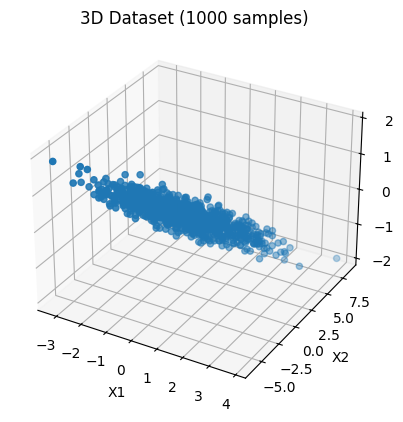

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.title("3D Dataset (1000 samples)")
plt.show()

In [12]:
x.mean(axis=0)

array([ 0.01933206,  0.07408223, -0.00849918])

In [13]:
x_centered = x - x.mean(axis=0)

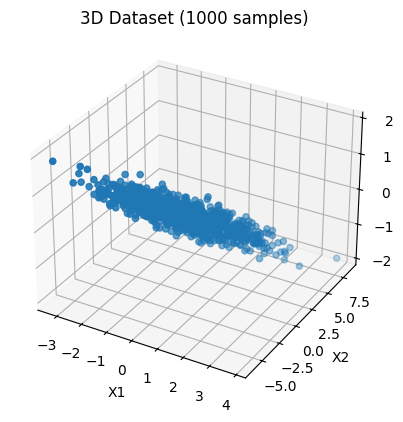

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_centered[:,0], x_centered[:,1], x_centered[:,2])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.title("3D Dataset (1000 samples)")
plt.show()

In [14]:
U, s, vt = np.linalg.svd(x_centered)

In [16]:
c1 = vt[0]
c2 = vt[1]

In [17]:
c1.shape

(3,)

In [19]:
w2 = vt[:2].T
x2d = x_centered @ w2

In [20]:
x2d.shape

(1000, 2)

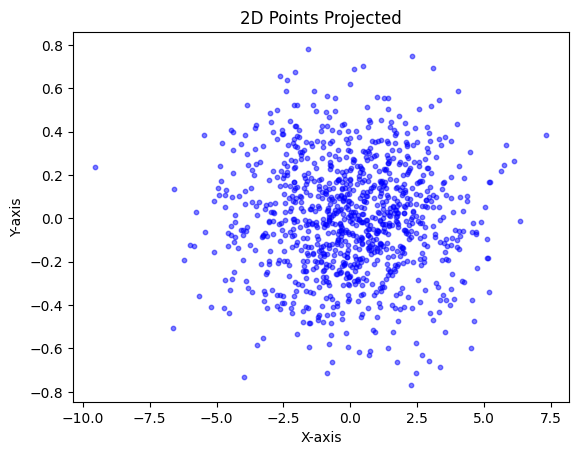

In [21]:
plt.scatter(x2d[:, 0], x2d[:, 1], s=10, c='blue', alpha=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points Projected')
plt.show()

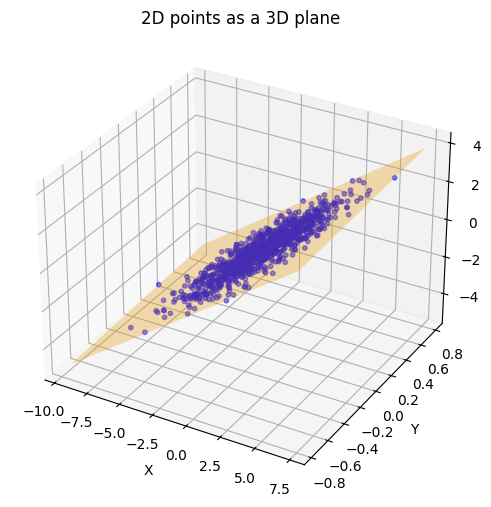

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# افترض أن هذه بياناتك الأصلية بعد إسقاط PCA أو مشابه
np.random.seed(0)

# تحويلها إلى plane في 3D
# نفترض أن z = a*x + b*y
a, b = 0.5, 0.3  # ميل المستوى على x و y
z2d = a*x2d[:, 0] + b*x2d[:, 1]

# رسم النقاط في 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2d[:,0], x2d[:,1], z2d, c='blue', alpha=0.5, s=10)

# رسم plane (مسطح) تقديري
x_plane = np.linspace(x2d[:,0].min(), x2d[:,0].max(), 10)
y_plane = np.linspace(x2d[:,1].min(), x2d[:,1].max(), 10)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = a*X_plane + b*Y_plane

ax.plot_surface(X_plane, Y_plane, Z_plane, color='orange', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D points as a 3D plane')

plt.show()